# Linear Regression Using scikit learn

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/legend4137/smvarshit.github.io/main/csv%20files/Real%20estate.csv')

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
from sklearn import linear_model
# To use linear regression

from sklearn.model_selection import train_test_split
# To split our array or matrix into training set and test set

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares (linear_model module)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split (About train_test_split)

> We can either use this built-in function or just selecting the training and test set manually say:<br>
x_train=df.iloc[:300,:7]<br>
x_test=df.iloc[300:,:7]

In [ ]:
len(df.columns)

8

In [ ]:
# Selecting columns from the dataframe
x=df.iloc[:,1:7]
y=df.iloc[:,7]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y)

In [ ]:
# Since training examples are shuffled and taken randomly the indices are jumbled
# So to correct it we are reseting the index and droping the previous indices
x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html (About the class LinearRegression)

In [ ]:
model = linear_model.LinearRegression()

model.fit(x_train,y_train)
model.coef_

array([ 5.30984740e+00, -2.86830619e-01, -4.67931760e-03,  1.00413222e+00,
        2.05359144e+02, -2.21282059e+01])

In [ ]:
model.predict([[0,0,0,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-13083.84362184])

In [ ]:
y_hat_train=model.predict(x_train)
y_hat_test=model.predict(x_test)

# y_hat is a numpy.ndarray
df1=pd.Series(y_hat_train)
df2=pd.Series(y_hat_test)
df2

0      37.339889
1      41.245691
2      43.283791
3      32.016203
4      47.254541
         ...    
99     34.533616
100    26.338084
101    51.529370
102    48.168475
103    44.591475
Length: 104, dtype: float64

In [ ]:
df3=x_test.copy()
df3.insert(len(df3.columns),'Y house price of unit area',y_test)
df3.insert(len(df3.columns),'Predicted Y house price of unit area',df2)
df3

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Predicted Y house price of unit area
0,2013.083,28.4,617.44240,3,24.97746,121.53299,34.6,37.339889
1,2013.333,34.5,324.94190,6,24.97814,121.54170,46.0,41.245691
2,2013.333,14.8,393.26060,6,24.96172,121.53812,7.6,43.283791
3,2013.333,21.7,1055.06700,0,24.96211,121.54928,23.1,32.016203
4,2012.917,3.5,49.66105,8,24.95836,121.53756,57.8,47.254541
...,...,...,...,...,...,...,...,...
99,2012.917,40.9,167.59890,5,24.96630,121.54026,41.0,34.533616
100,2012.750,14.2,1801.54400,1,24.95153,121.55254,24.8,26.338084
101,2013.417,0.0,292.99780,6,24.97744,121.54458,73.6,51.529370
102,2013.417,9.7,421.47900,5,24.98246,121.54477,49.3,48.168475


In [ ]:
from sklearn import metrics

train_error=metrics.mean_squared_error(df1,y_train)
test_error=metrics.mean_squared_error(df2,y_test)
r2score=metrics.r2_score(df2,y_test)

print(f"Training error : {train_error}\nTesst error : {test_error}\nCoeffecient of determination : {r2score}")

Training error : 75.77161233898376
Tesst error : 82.24101615017938
Coeffecient of determination : 0.1004924560634034


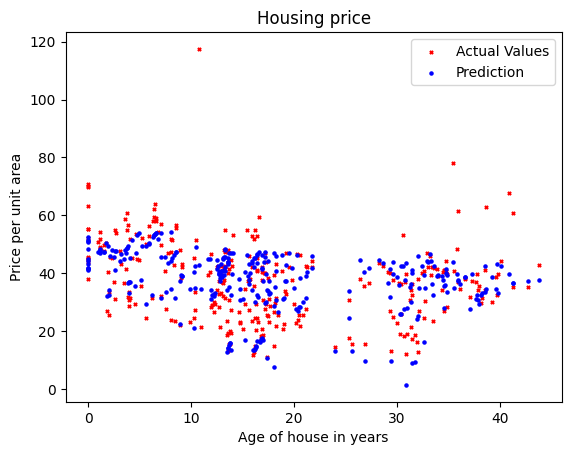

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_train[["X2 house age"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X2 house age"]], y_hat_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("Age of house in years")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()

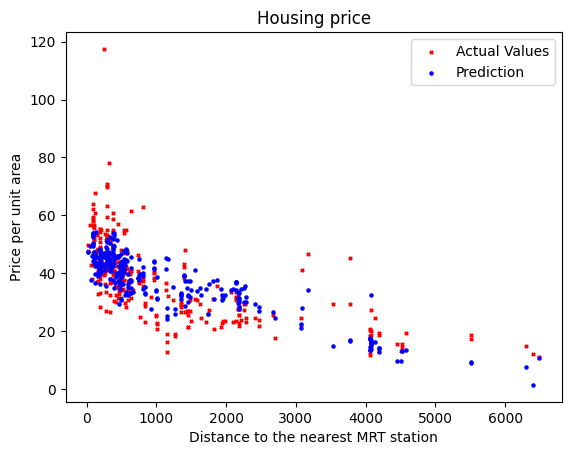

In [ ]:
plt.scatter(x_train[["X3 distance to the nearest MRT station"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X3 distance to the nearest MRT station"]], y_hat_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("Distance to the nearest MRT station")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()

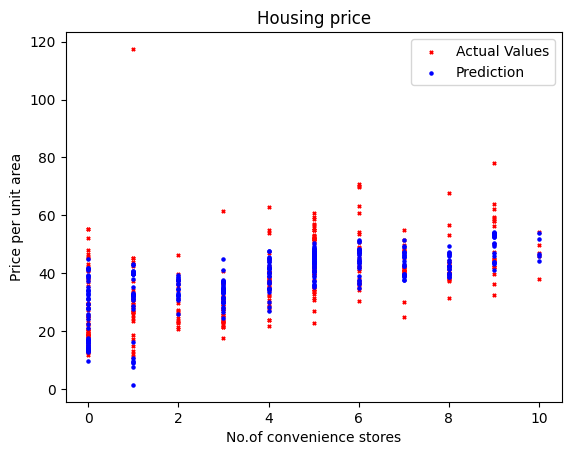

In [ ]:
plt.scatter(x_train[["X4 number of convenience stores"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X4 number of convenience stores"]], y_hat_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("No.of convenience stores")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()

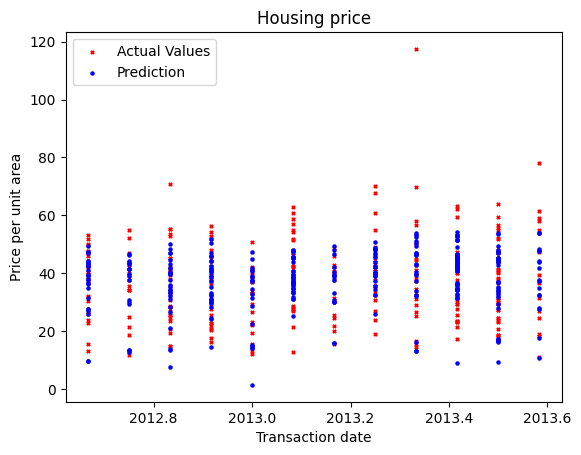

In [ ]:
plt.scatter(x_train[["X1 transaction date"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X1 transaction date"]], y_hat_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("Transaction date")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()

# Linear Regression using OOP

In [ ]:
def cost_function_alt(x,y,n,m,w,b):
  j_wb=0
  for i in range(m):
    f_wb=np.dot(x[i],w)+b
    j_wb+=(f_wb-y[i])**2
  j_wb=j_wb/(2*m)
  return j_wb

In [ ]:
def cost_function(x,y,n,m,w,b):
  prediction=np.dot(x,w)+b
  yy1=(prediction-y)**2
  j_wb=np.sum(yy1)/(2*m)
  return j_wb

In [ ]:
def prediction(x,w,b):
  output=np.dot(x,w)+b
  return output

In [ ]:
def gradient_desent(x,y,n,m,w,b,alpha):
    dj_dw=np.zeros(n)
    dj_db=0

    for i in range(n):
        for j in range(m):
            f_wb=np.dot(x[j],w)+b
            dj_dw[i]+=(f_wb-y[j])*x[j][i]

    for j in range(m):
        f_wb=np.dot(x[j],w)+b
        dj_db+=(f_wb-y[j])

    for i in range(n):
        w[i]-=(alpha/m)*dj_dw[i]
    b-=(alpha/m)*dj_db
    #print(f"dj/dw : {dj_dw}\ndj/db : {dj_db}")
    return w,b

In [ ]:
gradient_desent(x_train.to_numpy(),y_train.to_numpy(),6,x_train.shape[0],[0,10,0,0,0,0],0,1e-7)

([-0.028108002430258062,
  9.999616282919355,
  -0.017195447681655172,
  -5.62038387096774e-05,
  -0.00034862666510548365,
  -0.001696864623142903],
 -1.3962354838709684e-05)

In [ ]:
class Linear_Regression:
  def __init__(self, x, y, alpha, iterations):
    self.x=x.to_numpy()
    self.y=y.to_numpy()
    self.alpha=alpha
    self.iterations=iterations
    self.m=x_train.shape[0]
    self.n=x_train.shape[1]
    self.w=np.zeros(self.n)
    self.w[0]=10
    # self.w[1]=1
    self.w[2]=1
    self.w[3]=1
    self.w[4]=1
    self.w[5]=1
    self.b=0
#    self.x_array=self.x.to_numpy()
#    self.y_array=self.y.to_numpy()

  def train(self):
    for i in range(self.iterations):
      #print(i+1)
      self.cost=cost_function(self.x,self.y,self.n,self.m,self.w,self.b)
      self.w,self.b=gradient_desent(self.x,self.y,self.n,self.m,self.w,self.b,self.alpha)
      #print(f"Value of w vector : {self.w}\nValue of b : {self.b}")
      print(f"{i+1} Cost (Training error) : {self.cost}")

  def predict(self, test):
    output=np.dot(test,self.w)+self.b
    return output

  def score(self, predicted, actual):
    score=metrics.r2_score(predicted,actual)
    return score


In [ ]:
mod=Linear_Regression(x_train,y_train,3.3e-7,10000)

In [ ]:
mod.train()

Streaming output truncated to the last 5000 lines.
5001 Cost (Training error) : 42.94717539092218
5002 Cost (Training error) : 42.94703713102496
5003 Cost (Training error) : 42.946898883214374
5004 Cost (Training error) : 42.94676064748933
5005 Cost (Training error) : 42.946622423848794
5006 Cost (Training error) : 42.94648421229169
5007 Cost (Training error) : 42.94634601281698
5008 Cost (Training error) : 42.946207825423585
5009 Cost (Training error) : 42.946069650110466
5010 Cost (Training error) : 42.945931486876546
5011 Cost (Training error) : 42.945793335720786
5012 Cost (Training error) : 42.94565519664212
5013 Cost (Training error) : 42.945517069639486
5014 Cost (Training error) : 42.94537895471182
5015 Cost (Training error) : 42.94524085185808
5016 Cost (Training error) : 42.945102761077194
5017 Cost (Training error) : 42.94496468236812
5018 Cost (Training error) : 42.9448266157298
5019 Cost (Training error) : 42.94468856116115
5020 Cost (Training error) : 42.944550518661146
5

In [ ]:
print(mod.w)
print(mod.b)

[-0.01345664 -0.1558199  -0.0056005   0.97556959  0.87582524  0.39534267]
-0.004974835509535144


In [ ]:
y_predicted_train=mod.predict(x_train)
y_predicted_test=mod.predict(x_test)

In [ ]:
mod.score(y_predicted_train,y_train)

0.05272839910401028

In [ ]:
df1=pd.DataFrame(y_train)
df1.insert(len(df1.columns), "Y predicted", y_predicted_train)
df1

,Y house price of unit area,Y predicted
0,26.5,33.060725
1,19.2,15.010595
2,46.7,43.910091
3,48.5,43.115812
4,41.5,43.487660
...,...,...
305,47.7,49.293307
306,48.0,33.572599
307,47.7,44.968719
308,32.5,39.505128


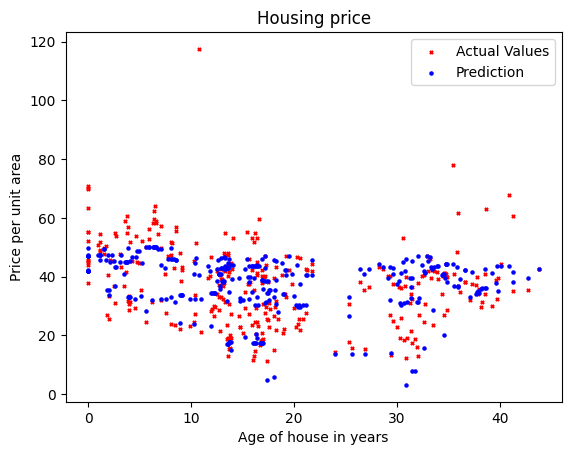

In [ ]:
plt.scatter(x_train[["X2 house age"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X2 house age"]], y_predicted_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("Age of house in years")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()

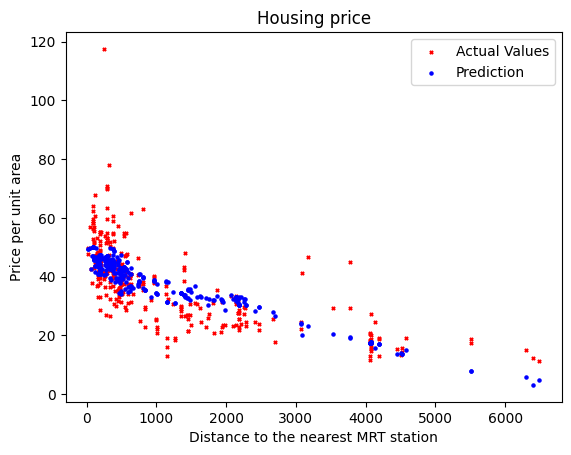

In [ ]:
plt.scatter(x_train[["X3 distance to the nearest MRT station"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X3 distance to the nearest MRT station"]], y_predicted_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("Distance to the nearest MRT station")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()

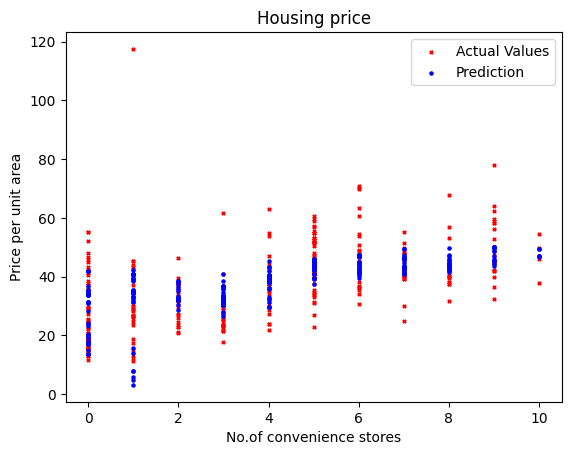

In [ ]:
plt.scatter(x_train[["X4 number of convenience stores"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X4 number of convenience stores"]], y_predicted_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("No.of convenience stores")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()

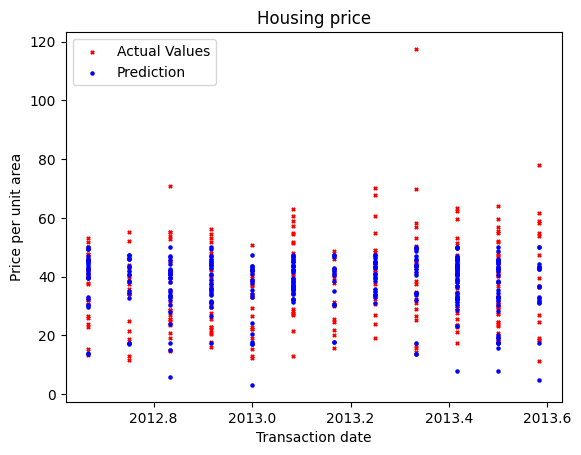

In [ ]:
plt.scatter(x_train[["X1 transaction date"]], y_train, marker='x', c='r', s=5, label="Actual Values")
plt.scatter(x_train[["X1 transaction date"]], y_predicted_train, c='b', s=5, label="Prediction")

plt.title("Housing price")
plt.xlabel("Transaction date")
plt.ylabel("Price per unit area")
plt.legend()
plt.show()